In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yfin
import seaborn as sns
import math
from numpy import linalg as LA
# Download stock prices from Yahoo Finance and set the time period for download
start = datetime.date(2018, 1, 2)
end = datetime.date(2023, 12, 31)
stocks = yfin.download(["AAPL", "F", "WMT","PFE"], start, end, auto_adjust = False)["Adj Close"]
stocks.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,F,PFE,WMT
Date,,,,
2018-01-02,40.426830,8.470927,25.081696,29.041033
2018-01-03,40.419785,8.537839,25.267536,29.294361
2018-01-04,40.607525,8.685043,25.322603,29.320866
2018-01-05,41.069855,8.832248,25.370781,29.494652
2018-01-08,40.917320,8.798791,25.088575,29.930613


In [2]:
stocks.index = pd.to_datetime(stocks.index).strftime("%Y-%m-%d")

In [3]:
# In order to calculate the returns of the stocks, we need to drop the NA rows.
stocks_returns = stocks[["AAPL", "F", "WMT","PFE"]].dropna().pct_change()
stocks_returns = stocks_returns.dropna()
stocks_returns.head()

Ticker,AAPL,F,WMT,PFE
Date,,,,
2018-01-03,-0.000174,0.007899,0.008723,0.007409
2018-01-04,0.004645,0.017241,0.000905,0.002179
2018-01-05,0.011385,0.016949,0.005927,0.001903
2018-01-08,-0.003714,-0.003788,0.014781,-0.011123
2018-01-09,-0.000115,-0.005323,-0.012007,-0.001097


In [4]:
# Perform SVD for stock returns
U, s, VT = np.linalg.svd(stocks_returns)

# Present the result
print("Stock Returns Matrix Dimension:")
print(stocks_returns.shape)
print("\nDimension of Matrix U:")
print(U.shape)
print("\nSingular values:")
print(s)
print("\nDimension of Matrix V^T:")
print(VT.shape)

Stock Returns Matrix Dimension:
(1508, 4)

Dimension of Matrix U:
(1508, 1508)

Singular values:
[1.11696774 0.72489545 0.55820578 0.47159252]

Dimension of Matrix V^T:
(4, 4)


/Users/huayitang/PycharmProjects/WQU_Msc_notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huayitang/PycharmProjects/WQU_Msc_notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huayitang/PycharmProjects/WQU_Msc_notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huayitang/PycharmProjects/WQU_Msc_notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huayitang/PycharmProjects

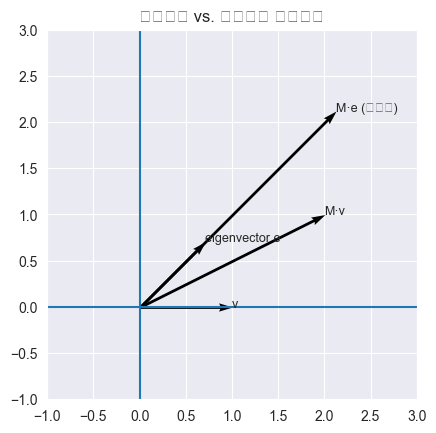

M 的特征值: [3. 1.]

示例矩阵 A =
[[1 2 3]
 [2 4 6]
 [3 6 9]]
A 的秩 = 1


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 特征向量/特征值演示 --------------------------------------------------
M = np.array([[2, 1],
              [1, 2]])

e_vals, e_vecs = np.linalg.eig(M)

# 选一个“普通”向量 v（不是特征向量）
v = np.array([1, 0])
Mv = M @ v

# 取第 1 个特征向量 e
e = e_vecs[:, 0]
Me = M @ e

# 绘图比较：普通向量 v 经过变换方向改变，而特征向量 e 方向不变（只被拉伸）
plt.figure()
plt.axhline(0)
plt.axvline(0)
# 起点都放在原点
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, Mv[0], Mv[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, e[0], e[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, Me[0], Me[1], angles='xy', scale_units='xy', scale=1)
plt.text(v[0], v[1], "v", fontsize=9)
plt.text(Mv[0], Mv[1], "M·v", fontsize=9)
plt.text(e[0], e[1], "eigenvector e", fontsize=9)
plt.text(Me[0], Me[1], "M·e (同方向)", fontsize=9)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal')
plt.title("普通向量 vs. 特征向量 变换对比")
plt.show()

print("M 的特征值:", e_vals)
print()

# 2) 秩 (rank) 示例 --------------------------------------------------------
A = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]])  # 每一行都是第一行的倍数 → 线性相关

rank_A = np.linalg.matrix_rank(A)
print("示例矩阵 A =")
print(A)
print("A 的秩 =", rank_A)


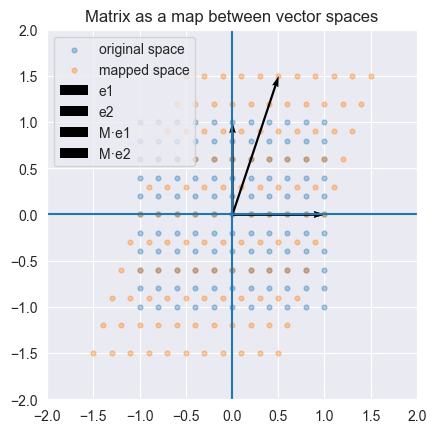

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 矩阵 M：结合拉伸与剪切
M = np.array([[1, 0.5],
              [0, 1.5]])

# 生成 [-1,1] 方格
grid_x = np.linspace(-1, 1, 11)
grid_y = np.linspace(-1, 1, 11)
points = np.array([[x, y] for x in grid_x for y in grid_y])
transformed = (M @ points.T).T

# 绘图开始
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=12, alpha=0.35, label="original space")
plt.scatter(transformed[:, 0], transformed[:, 1], s=12, alpha=0.35, label="mapped space")

# 标准基 & 变换后基
basis = np.array([[1, 0], [0, 1]])
trans_basis = (M @ basis.T).T

for vec, lab in zip(basis, ["e1", "e2"]):
    plt.quiver(0, 0, vec[0], vec[1],
               angles='xy', scale_units='xy', scale=1,
               width=0.006, label=lab)

for vec, lab in zip(trans_basis, ["M·e1", "M·e2"]):
    plt.quiver(0, 0, vec[0], vec[1],
               angles='xy', scale_units='xy', scale=1,
               width=0.006, label=lab)

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Matrix as a map between vector spaces")
plt.legend()
plt.show()
